Importar Librerías

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split

Importar Dataset

https://www.kaggle.com/maajdl/yeh-concret-data

In [4]:
concrete_data = pd.read_csv('Concrete_Data_Yeh.csv')
concrete_data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
import seaborn as sns

Text(0.5, 1.0, 'Correlación de Variables')

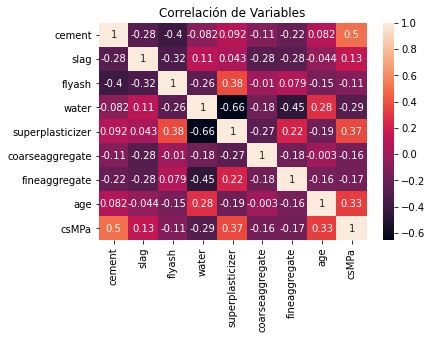

In [7]:
corr = concrete_data.corr()
sns.heatmap(corr,xticklabels=True,yticklabels=True,annot = True)
plt.title("Correlación de Variables")

In [8]:
concrete_feat_X = concrete_data.drop(['csMPa'], axis = 1)
concrete_feat_X.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [9]:
y_strength = concrete_data['csMPa'].values
y_strength

array([79.99, 61.89, 40.27, ..., 23.7 , 32.77, 32.4 ])

Dividir Dataset

In [10]:
X_train, X_validation, y_train, y_validation = train_test_split(concrete_feat_X, y_strength, test_size = .7, random_state = 8)

Crear Regresor

In [11]:
from sklearn.tree import DecisionTreeRegressor

In [19]:
treeD = DecisionTreeRegressor(max_depth=35)

treeD.fit(X_train, y_train)

tree_score = treeD.score(X_validation, y_validation)
print('Tree Score: ', tree_score)

Tree Score:  0.7017026371202861


In [20]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
forest = RandomForestRegressor(max_depth=20,n_estimators=100)

forest.fit(X_train, y_train)

randomforest_score = forest.score(X_validation, y_validation)
print('Forest Score: ', randomforest_score)

Forest Score:  0.851744527665669


In [31]:
from sklearn.ensemble import GradientBoostingRegressor

In [53]:
GradBoost = GradientBoostingRegressor(n_estimators=100, max_depth=5)

GradBoost.fit(X_train, y_train)

GradBoost_score = GradBoost.score(X_validation, y_validation)
print('GradientBoosting Score: ', GradBoost_score)

GradientBoosting Score:  0.8764870921382935


In [67]:
tree = treeD.predict(X_validation)
rf = forest.predict(X_validation)
gdB = GradBoost.predict(X_validation)

tree.shape

(721,)

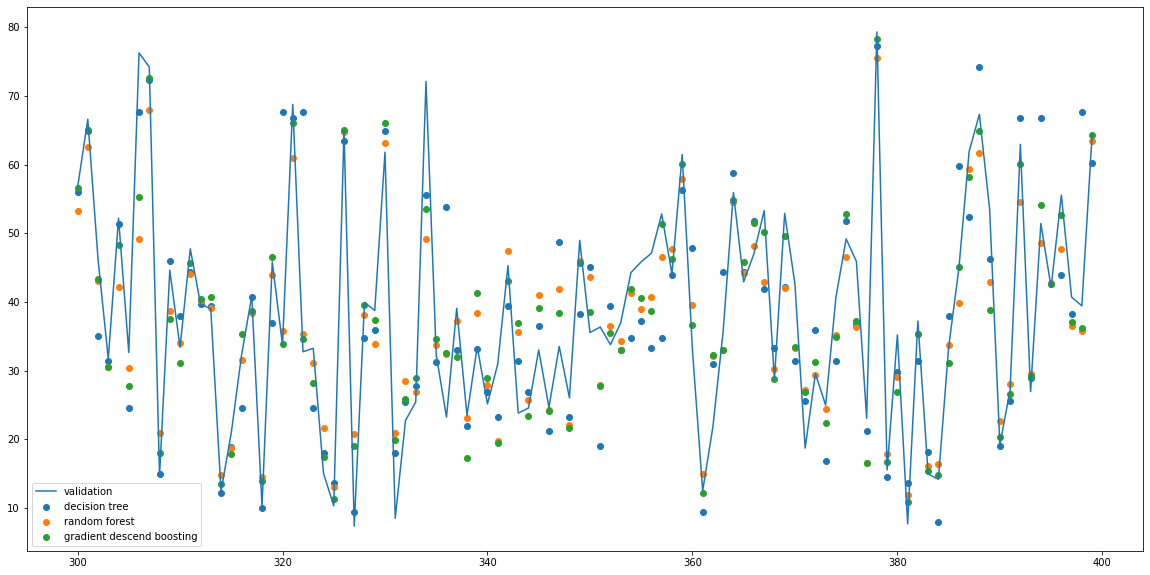

In [74]:
plt.figure(figsize=(20,10))
plt.plot(range(y_validation.size)[300:400], y_validation[300:400], label = "validation")
plt.plot(range(y_validation.size)[300:400], tree[300:400], label = "decision tree")
plt.plot(range(y_validation.size)[300:400], rf[300:400], label = "random forest")
plt.plot(range(y_validation.size)[300:400], gdB[300:400], label = "gradient descend boosting")
plt.legend()

plt.show()